In [1]:
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings; warnings.simplefilter('ignore')
import pickle as pk
import random
import pandas as pd
import numpy as np
import ast
import os
from torchvision import transforms

In [2]:
resize = transforms.Resize((300, 300))

In [3]:
data_path = '/home/rts_azure/data/bali-26/'
image_folders = os.listdir(data_path)

In [4]:
print (len(image_folders))
image_folders.remove('banana')
image_folders.remove('sugarpalm')
image_folders.remove('cacao')
print (len(image_folders))

26
23


In [5]:
artificial_mixed_plants = '/home/rts_azure/data/artificialmixedplants/'

nilam  - Done
guava  - Done
sawo  - Done
taro  - Done
bamboo (1280, 720, 3)
jackfruit (1080, 1920, 3)
bamboo  - Done
coffeearabica (1080, 1920, 3)
bamboo (1280, 720, 3)
coffeearabica  - Done
lychee  - Done
aroid  - Done
cinnamon  - Done
mango  - Done
papaya  - Done
dragonfruit  - Done
vanilla (1920, 1080, 3)
bamboo (1280, 720, 3)
vanilla  - Done
jackfruit  - Done
frangipani  - Done
whitepepper  - Done
snakefruit  - Done
waterguava  - Done
zodia (1920, 1080, 3)
bamboo (1280, 720, 3)
zodia  - Done
starfruit  - Done
passiflora  - Done
durian  - Done
mangosteen  - Done


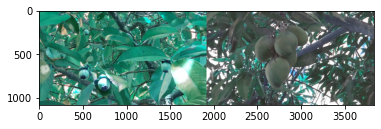

In [6]:
for class_name in image_folders:
    class_path = os.path.join(data_path,class_name)
    class_images = random.sample(os.listdir(class_path), 10)
    for class_image in class_images:
        if '.pk' in class_image:
            continue
        img1_path = os.path.join(class_path, class_image)
        img1 = cv2.imread(img1_path)
        
        class2_name = random.sample(image_folders, 1)[0]
        while class2_name == class_name:
            class2_name = random.sample(image_folders, 1)[0]
        
        class2_path = os.path.join(data_path,class2_name)
        class2_image = random.sample(os.listdir(class2_path), 1)[0]
        while '.pk' in class2_image:
            class2_image = random.sample(os.listdir(class2_path), 1)[0]

        img2_path = os.path.join(class2_path, class2_image)
        img2 = cv2.imread(img2_path)
        
        if img1.shape[0] == img2.shape[1] and img1.shape[1] == img2.shape[0]:
            if img1.shape[0] < img1.shape[1]:
                img2 = cv2.rotate(img2, cv2.ROTATE_90_CLOCKWISE)
            else:
                img1 = cv2.rotate(img1, cv2.ROTATE_90_CLOCKWISE)

        if img1.shape[0] == img2.shape[0] and img1.shape[1] == img2.shape[1]:
            new_img = np.concatenate((img1, img2), axis=1)
            img_name = os.path.join(artificial_mixed_plants, f'{class_name}_{class2_name}.jpg')
            cv2.imwrite(img_name, new_img)
                        
        else:
            print (class_name, img1.shape)
            print (class2_name, img2.shape)
        
    print (class_name, " - Done")

In [10]:
class2_image

'bamboo_labels.pk'